<a href="https://colab.research.google.com/github/sergejhorvat/TensorFlow-in-Practice---Coursera/blob/master/Convolutional%20Neural%20Networks%20in%20TensorFlow/Exercise_8_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow-gpu==2.0.0
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
tf.__version__

     |████████████████████████████████| 380.8MB 41kB/s 
     |████████████████████████████████| 3.8MB 40.6MB/s 
     |████████████████████████████████| 450kB 50.5MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existi

'2.0.0'

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [4]:
#uploaded=files.upload()

!wget --no-check-certificate \
    http://mojemjesto.net/Coursera/TensorFlow_in_practice/sign_mnist_train.csv.zip \
    -O /tmp/sign_mnist_train.csv.zip
  
!wget --no-check-certificate \
    http://mojemjesto.net/Coursera/TensorFlow_in_practice/sign_mnist_test.csv.zip \
    -O /tmp/sign_mnist_test.csv.zip



--2019-11-19 19:44:00--  http://mojemjesto.net/Coursera/TensorFlow_in_practice/sign_mnist_train.csv.zip
Resolving mojemjesto.net (mojemjesto.net)... 69.163.152.21
Connecting to mojemjesto.net (mojemjesto.net)|69.163.152.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25759917 (25M) [application/zip]
Saving to: ‘/tmp/sign_mnist_train.csv.zip’

/tmp/sign_mnist_tra 100%[===================>]  24.57M  11.2MB/s    in 2.2s    

2019-11-19 19:44:03 (11.2 MB/s) - ‘/tmp/sign_mnist_train.csv.zip’ saved [25759917/25759917]

--2019-11-19 19:44:04--  http://mojemjesto.net/Coursera/TensorFlow_in_practice/sign_mnist_test.csv.zip
Resolving mojemjesto.net (mojemjesto.net)... 69.163.152.21
Connecting to mojemjesto.net (mojemjesto.net)|69.163.152.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6688121 (6.4M) [application/zip]
Saving to: ‘/tmp/sign_mnist_test.csv.zip’

/tmp/sign_mnist_tes 100%[===================>]   6.38M  5.44MB/s    in 1.2s    

2

In [0]:
import os
import zipfile

local_zip = '/tmp/sign_mnist_train.csv.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/sign_mnist_test.csv.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [6]:
os.chdir('/tmp/')
print(os.getcwd())
from numpy import genfromtxt

/tmp


In [7]:
from numpy import genfromtxt
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  #
  # The first value is the label
  #
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion

  # I will use numpy to get data no bulky read line or other methods 
  data = genfromtxt(filename, delimiter=',')
  labels = data[1:,0]
  images = data[1:,1:785]
  images = images.reshape((images.shape[0], 28, 28))
  return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [13]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = training_images.reshape((training_images.shape[0], training_images.shape[1], training_images.shape[2], 1))# Your Code Here
testing_images = testing_images.reshape((testing_images.shape[0], testing_images.shape[1], testing_images.shape[2], 1))# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
      rescale = 1./255,	  
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
    )

validation_datagen = ImageDataGenerator(
     rescale = 1./255,
    )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
#print(training_images[1,:,:,:])

In [18]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([# Your Code Here
    # The first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
    ])

# Show the model summary
model.summary()

# Compile Model. 
model.compile(# Your Code Here
    loss='sparse_categorical_crossentropy',
    optimizer="Adam",
    metrics=['accuracy'])

# Train the Model
history = model.fit_generator(# Your Code Here
                              train_datagen.flow(training_images,training_labels,batch_size=32),
                              steps_per_epoch = len(training_images) / 32,
                              epochs=10,
                              validation_data= validation_datagen.flow(testing_images,testing_labels, batch_size=32),
                              validation_steps = len(testing_images) / 32                             
                              )

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 3200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

[6.92426086682151, 0.56609035]

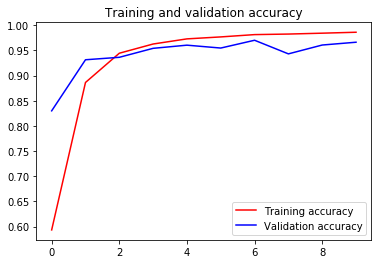

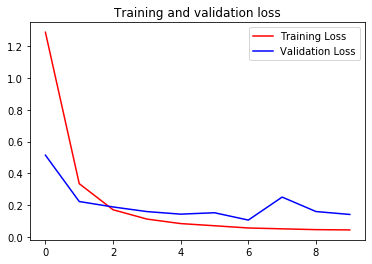

In [20]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']# Your Code Here
val_acc = history.history['val_accuracy']# Your Code Here
loss = history.history['loss']# Your Code Here
val_loss = history.history['val_loss']# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()